In [1]:
# Objective: predictive modelling, to assess factors leading to patients' death from Covid-19
# Binary classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
# to import dataset
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/COVID-19_Case_Surveillance_Public_Use_Data.csv", low_memory=False)

In [6]:
# to display variables in the dataset
# there are many missing or unknown variables in the dataset
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


In [9]:
# to check variable type, dataset consists of only categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


In [11]:
# to check for missing values
df.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

In [12]:
# to check % of missing values of each variable
100 * df.isnull().sum()/len(df)

cdc_report_dt                     0.000000
pos_spec_dt                      65.844592
onset_dt                         47.698802
current_status                    0.000000
sex                               0.000214
age_group                         0.001059
Race and ethnicity (combined)     0.000083
hosp_yn                           0.000000
icu_yn                            0.000000
death_yn                          0.000000
medcond_yn                        0.000000
dtype: float64

In [15]:
# to remove unimportant variables in the dataset
df = df.drop(['pos_spec_dt','onset_dt'], axis=1)

In [17]:
# to remove all missing values from variables 'sex', 'age_group','Race and ethnicity (combined)' as it is less than 5%
df = df.dropna()

In [18]:
# to check that there are no more missing values in the data
df.isnull().sum()

cdc_report_dt                    0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

In [21]:
# to check each categorical variable individually
df['death_yn'].value_counts()

death_yn
No         3690765
Missing    3486890
Unknown    1043765
Yes         183570
Name: count, dtype: int64

In [23]:
# to reduce the no. of categories for each variable
df['death_yn'] = df['death_yn'].replace('Missing','Unknown')

In [25]:
# to double check replacement
df['death_yn'].value_counts()

death_yn
Unknown    4530655
No         3690765
Yes         183570
Name: count, dtype: int64

In [27]:
df['cdc_report_dt']

0          2020/11/10
1          2020/11/14
2          2020/11/19
3          2020/11/14
4          2020/11/13
              ...    
8405074    2020/10/22
8405075    2020/10/25
8405076    2020/07/18
8405077    2020/11/19
8405078    2020/11/03
Name: cdc_report_dt, Length: 8404990, dtype: object

In [29]:
# cdc report is currently in an object, to convert it into 'datetime' format for further analysis
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'])

In [31]:
# to extract further information, month and year
df['Year'] = df['cdc_report_dt'].dt.year
df['Month'] = df['cdc_report_dt'].dt.month

In [33]:
# to check newly created variables
df.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,Year,Month
0,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,2020,11
1,2020-11-14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,11
2,2020-11-19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,11
3,2020-11-14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,2020,11
4,2020-11-13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,11


In [35]:
# to remove cdc report variable after extracting data from it
df = df.drop('cdc_report_dt', axis=1)

In [37]:
# to convert numeric months to month names
import calendar
from datetime import datetime

In [39]:
# to convert digits to month months using lambda
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

In [41]:
df.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,Year,Month
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,2020,November
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,2020,November
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,November


In [43]:
df['sex'].value_counts()

sex
Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: count, dtype: int64

In [45]:
# to convert all 'Missing' to 'Unknown'
df['sex'] = df['sex'].replace('Missing','Unknown')

In [47]:
df['sex'].value_counts()

sex
Female     4340898
Male       3970591
Unknown      93346
Other          155
Name: count, dtype: int64

In [49]:
df['age_group'].value_counts()

age_group
20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: count, dtype: int64

In [51]:
df['hosp_yn'].value_counts()

hosp_yn
No         3502508
Missing    3227280
Unknown    1136446
Yes         538756
Name: count, dtype: int64

In [53]:
# to convert all missing to unknown
df['hosp_yn'] = df['hosp_yn'].replace('Missing','Unknown')

In [55]:
df['hosp_yn'].value_counts()

hosp_yn
Unknown    4363726
No         3502508
Yes         538756
Name: count, dtype: int64

In [57]:
df['Race and ethnicity (combined)'].value_counts()

Race and ethnicity (combined)
Unknown                                                 2781165
White, Non-Hispanic                                     2599402
Hispanic/Latino                                         1195726
Black, Non-Hispanic                                      736570
Missing                                                  601519
Multiple/Other, Non-Hispanic                             270503
Asian, Non-Hispanic                                      143067
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17196
Name: count, dtype: int64

In [59]:
# to replace all 'Missing' to 'Unknown'
df['Race and ethnicity (combined)'] = df['Race and ethnicity (combined)'].replace('Missing','Unknown')

In [61]:
df['Race and ethnicity (combined)'].value_counts()

Race and ethnicity (combined)
Unknown                                                 3382684
White, Non-Hispanic                                     2599402
Hispanic/Latino                                         1195726
Black, Non-Hispanic                                      736570
Multiple/Other, Non-Hispanic                             270503
Asian, Non-Hispanic                                      143067
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17196
Name: count, dtype: int64

In [63]:
df['icu_yn'].value_counts()

icu_yn
Missing    6178240
Unknown    1286223
No          879642
Yes          60885
Name: count, dtype: int64

In [65]:
# to convert all missing to unknown
df['icu_yn'] = df['icu_yn'].replace('Missing','Unknown')

In [69]:
df['icu_yn'].value_counts()

icu_yn
Unknown    7464463
No          879642
Yes          60885
Name: count, dtype: int64

In [71]:
df['medcond_yn'].value_counts()

medcond_yn
Missing    6063360
Unknown     838014
Yes         785216
No          718400
Name: count, dtype: int64

In [73]:
# to convert all missing to unknown
df['medcond_yn'] = df['medcond_yn'].replace('Missing','Unknown')

In [77]:
# to double-check the change
df['medcond_yn'].value_counts()

medcond_yn
Unknown    6901374
Yes         785216
No          718400
Name: count, dtype: int64

In [79]:
# to remove all 'Unknown' variable in all columns as data cleaning
df = df[df['sex']!='Unknown']
df = df[df['death_yn']!= 'Unknown']
df = df[df['hosp_yn']!= 'Unknown']
df = df[df['Race and ethnicity (combined)']!= 'Unknown']
df = df[df['icu_yn']!='Unknown']
df = df[df['medcond_yn'] != 'Unknown']
df = df[df['age_group'] != 'Unknown']

In [81]:
df['sex'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [83]:
df['death_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
df['hosp_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
df['Race and ethnicity (combined)'].unique()

array(['Black, Non-Hispanic', 'White, Non-Hispanic', 'Hispanic/Latino',
       'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic'],
      dtype=object)

In [89]:
df['icu_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [91]:
df['medcond_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
df['age_group'].unique()

array(['10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '0 - 9 Years', '60 - 69 Years', '80+ Years',
       '70 - 79 Years'], dtype=object)

In [95]:
# dataset does not contains any 'Missing' or 'Unknown' variables
df

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,Year,Month
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,November
11,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,2020,November
14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,2020,November
...,...,...,...,...,...,...,...,...,...,...
8404296,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,No,No,No,2020,November
8404365,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,No,No,Yes,2020,June
8404392,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,No,No,Yes,2020,May
8404461,Probable Case,Female,30 - 39 Years,Hispanic/Latino,No,No,No,No,2020,June


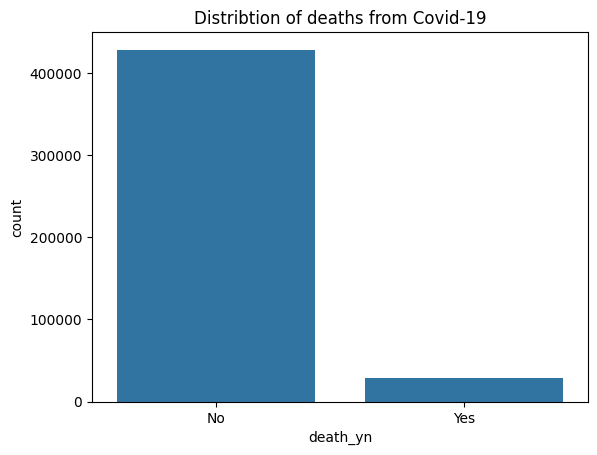

In [97]:
# Exploratory Data analysis
# Target variable 'death_yn'
sns.countplot(data = df, x='death_yn')
plt.title('Distribtion of deaths from Covid-19')
plt.show()

In [99]:
df['death_yn'].value_counts()

death_yn
No     428610
Yes     29169
Name: count, dtype: int64

In [101]:
# Class imbalanced, only 6.37% patients passed away from Covid-19
pd.DataFrame(100 * df['death_yn'].value_counts()/len(df))

,count
death_yn,
No,93.628148
Yes,6.371852


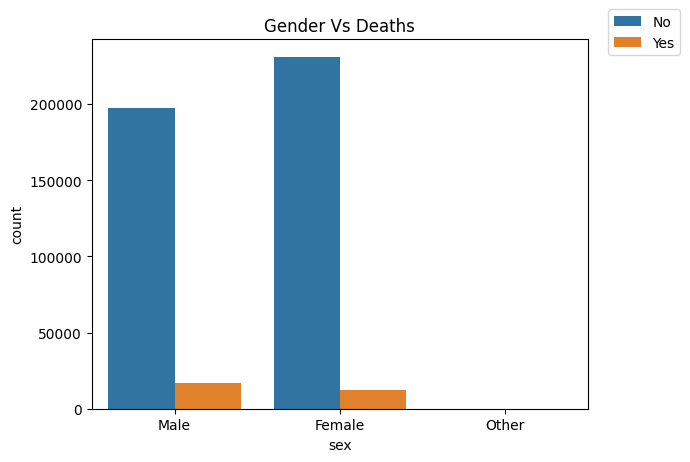

In [103]:
# mostly male patients passed away from Covid-19
sns.countplot(data=df, x='sex', hue='death_yn')
plt.title('Gender Vs Deaths')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [105]:
df['age_group'].value_counts()

age_group
20 - 29 Years    79676
50 - 59 Years    69653
30 - 39 Years    66258
40 - 49 Years    65798
60 - 69 Years    55541
10 - 19 Years    44218
70 - 79 Years    35232
80+ Years        26972
0 - 9 Years      14431
Name: count, dtype: int64

In [107]:
age_group_order = ['0 - 9 Years',
                   '10 - 19 Years',
                   '20 - 29 Years',
                  '30 - 39 Years',
                  '40 - 49 Years',
                  '50 - 59 Years',
                  '60 - 69 Years',
                  '70 - 79 Years',
                  '80+ Years']

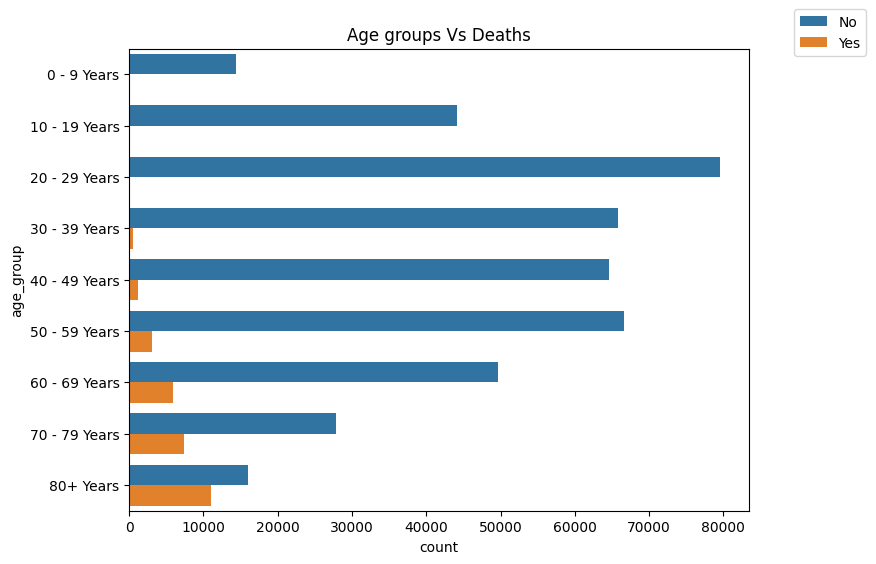

In [109]:
# majority of the patients who passed away from Covid-19 were from the older age group: 50 years onwards
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, y='age_group', hue='death_yn', order=age_group_order)
plt.title('Age groups Vs Deaths')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

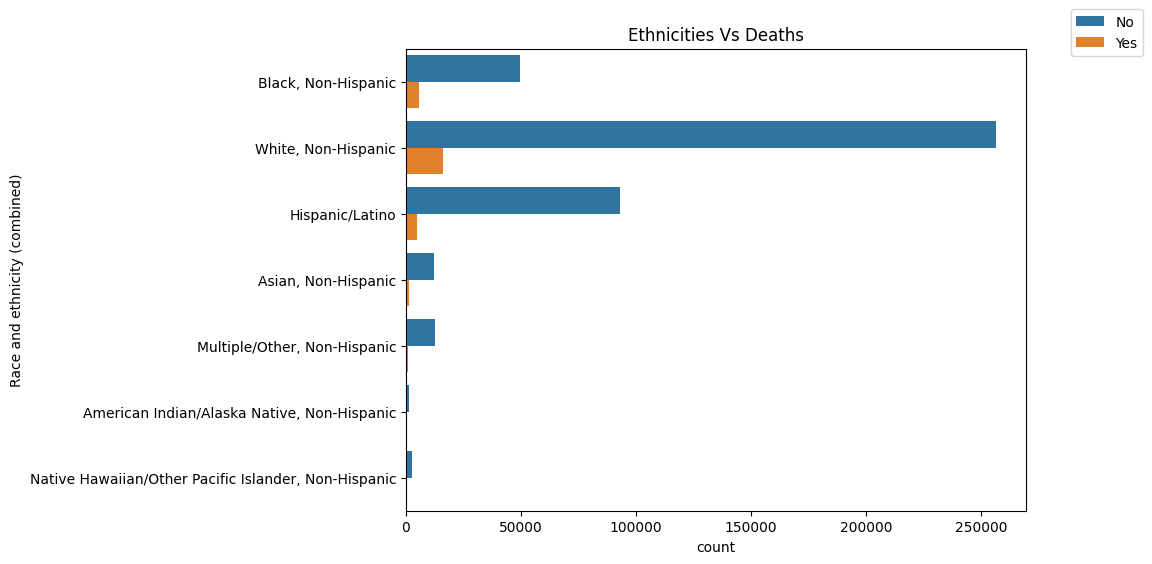

In [111]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, y='Race and ethnicity (combined)', hue='death_yn')
plt.title('Ethnicities Vs Deaths')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

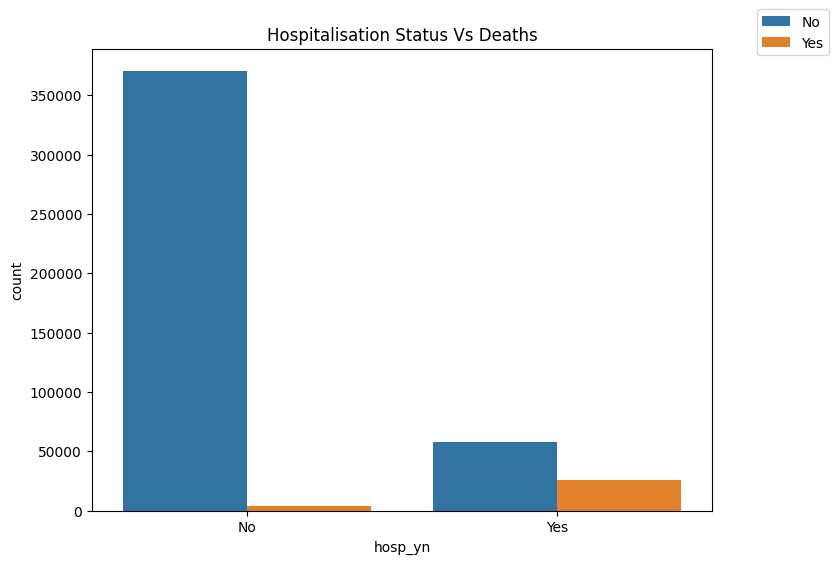

In [115]:
# majority of those who passed away have been hospitalised
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='hosp_yn', hue='death_yn')
plt.title('Hospitalisation Status Vs Deaths')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

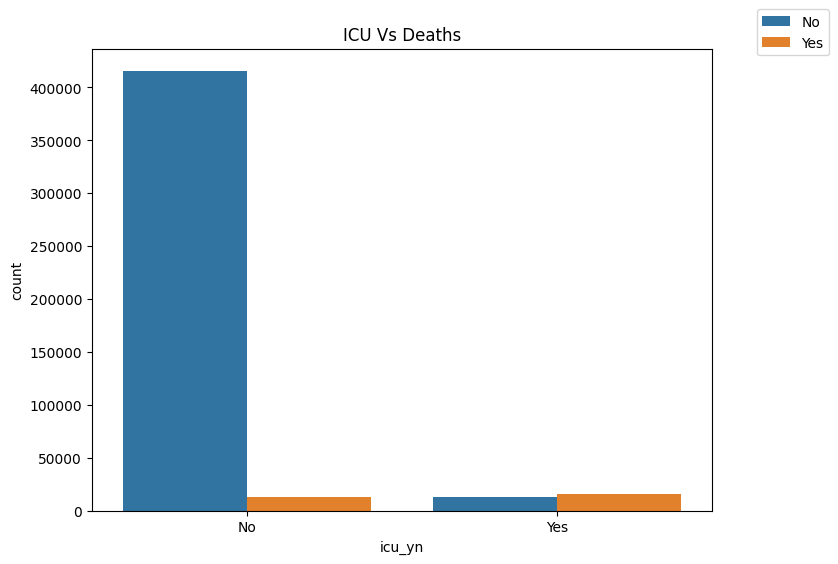

In [113]:
# those who were in ICU passed away
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='icu_yn', hue='death_yn')
plt.title('ICU Vs Deaths')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

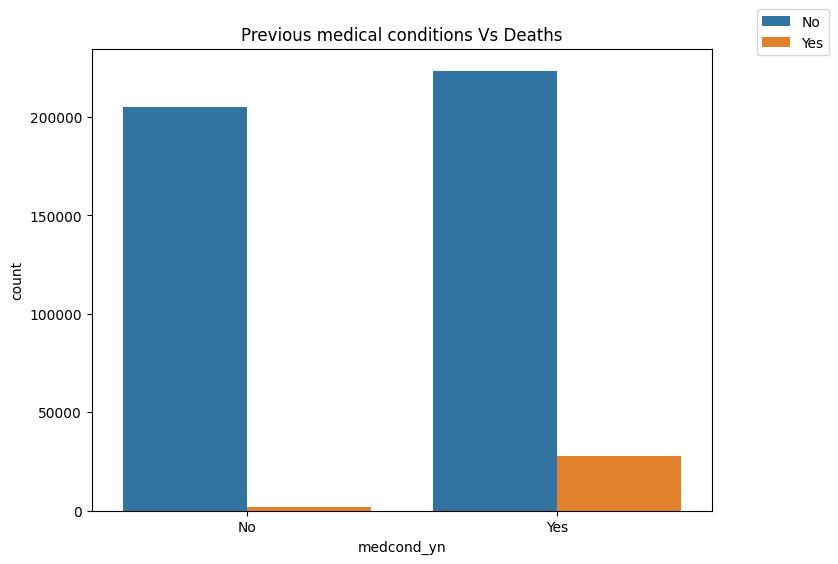

In [117]:
# patients who passed away from Covid-19 also has other medical conditions concurrently
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='medcond_yn', hue='death_yn')
plt.title('Previous medical conditions Vs Deaths')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [115]:
pd.DataFrame(df.groupby(['Year','death_yn'])['death_yn'].count())

death_yn
Year death_yn          
2020 No          428610
     Yes          29169

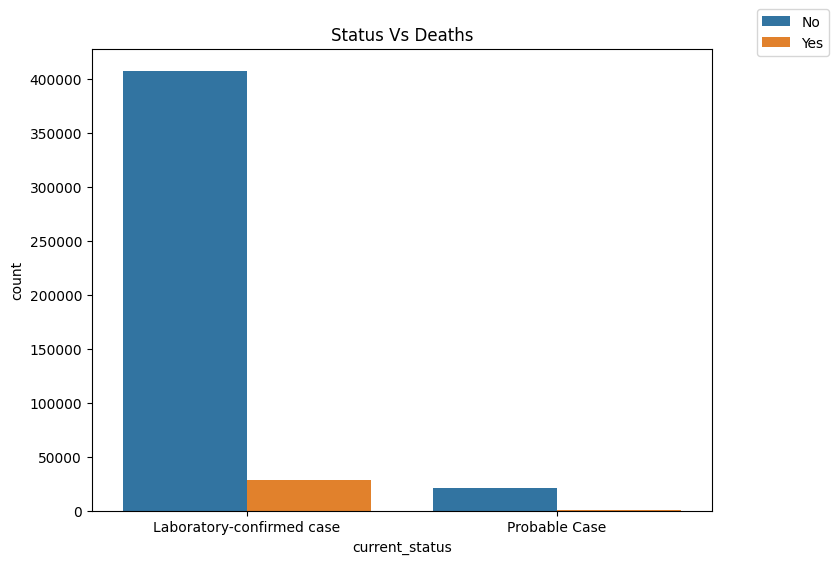

In [117]:
# majority of the patients who passed away had their Covid-19 status confirmed in the lab
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='current_status', hue='death_yn')
plt.title('Status Vs Deaths')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [119]:
df['Month'].value_counts()

Month
October      78060
November     70328
July         63768
August       63044
September    53370
June         49884
May          35518
April        32490
March        11231
February        70
January         16
Name: count, dtype: int64

In [121]:
month_order = ['January',
              'February',
              'March',
              'April',
              'May',
              'June',
              'July',
              'August',
              'September',
               'October',
               'November']

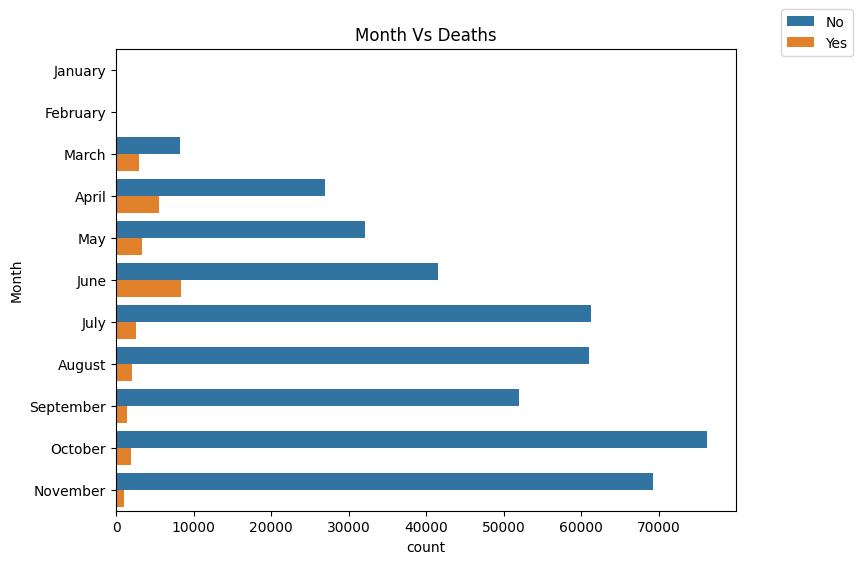

In [123]:
# June and April saw the most deaths from Covid-19
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, y='Month', hue='death_yn', order=month_order)
plt.title('Month Vs Deaths')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [125]:
# to prepare for predictive modelling
df['death_yn'] = df['death_yn'].map({'No':0, 'Yes':1})

In [127]:
df['death_yn'].unique()

array([0, 1], dtype=int64)

In [129]:
# Define X
X = df.drop('death_yn', axis=1)

In [131]:
# to convert to dummy variables and remove the first variable to prevent multicollinearity
X = pd.get_dummies(X, drop_first=True)

In [202]:
X

,Year,current_status_Probable Case,sex_Male,sex_Other,age_group_10 - 19 Years,age_group_20 - 29 Years,age_group_30 - 39 Years,age_group_40 - 49 Years,age_group_50 - 59 Years,age_group_60 - 69 Years,...,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
1,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14,2020,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404296,2020,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8404365,2020,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8404392,2020,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8404461,2020,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [133]:
y = df['death_yn']

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
# testing set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [141]:
# to create an instance of scaler 
scaler = MinMaxScaler()

In [143]:
scaled_X_train = scaler.fit_transform(X_train)

In [145]:
scaled_X_test = scaler.transform(X_test)

In [147]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
from xgboost import XGBClassifier

In [153]:
rf = RandomForestClassifier()

In [155]:
rf.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [157]:
# to predict on the testing data
rf_pred = rf.predict(scaled_X_test)

In [159]:
rf_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [161]:
rf_train_pred = rf.predict(scaled_X_train)

In [163]:
# to print predictions of the Random Forest training set
rf_train_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [165]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [167]:
# to compute confusion matrix for RF training set
rf_train_cm = confusion_matrix(y_train, rf_train_pred, normalize='true')
rf_train_cm

array([[0.98283825, 0.01716175],
       [0.43504101, 0.56495899]])

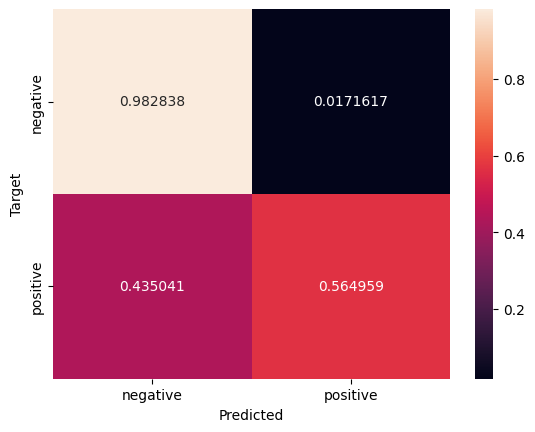

In [169]:
# to plot confusion matrix for Random Forest training set
def plot_cm(rf_train_cm):
    classes = ['negative','positive']
    df_rf_train_cm = pd.DataFrame(rf_train_cm, index=classes, columns=classes)
    ax = sns.heatmap(df_rf_train_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(rf_train_cm)
plt.show()

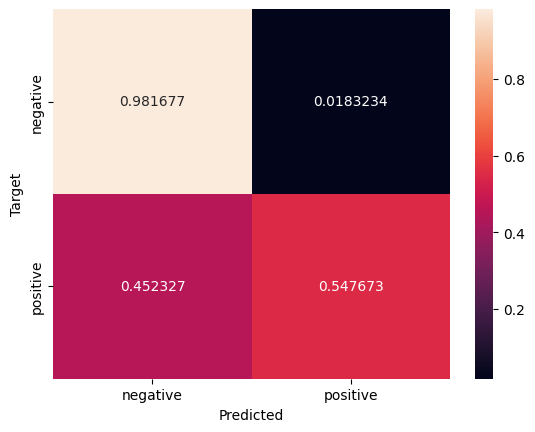

In [173]:
# to plot the confusion matrix for Random Forest Testing set
# accuracy rate for True Negative cases  = 98.12%
# accuracy rate for True positive cases (Covid-19) = 55.39%
rf_test_cm = confusion_matrix(y_test, rf_pred, normalize='true')
plot_cm(rf_test_cm)
plt.show()

In [175]:
print("RF train AUC:", roc_auc_score(y_train, rf_train_pred))
print("RF test AUC:", roc_auc_score(y_test, rf_pred))

RF train AUC: 0.7738986196159403
RF test AUC: 0.7646748363882518


In [177]:
# AUC score for Random Forest classifier test model = 0.76

In [179]:
print("RF train F1:", f1_score(y_train, rf_train_pred))
print("RF test F1:", f1_score(y_test, rf_pred)) 

RF train F1: 0.6215449460971063
RF test F1: 0.6035021888680425


In [181]:
print(classification_report(y_test,rf_pred)) # Random Forest classifier

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128524
           1       0.67      0.55      0.60      8810

    accuracy                           0.95    137334
   macro avg       0.82      0.76      0.79    137334
weighted avg       0.95      0.95      0.95    137334



In [183]:
# to build an AdaBoost classifier
ada = AdaBoostClassifier()

In [185]:
ada.fit(scaled_X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [187]:
# to do prediction on the Adaboost train set
ada_train_pred = ada.predict(scaled_X_train)

In [189]:
# to print first 10 prediction of Adaboost training set
ada_train_pred[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [191]:
# to predict on the X testing data
ada_pred = ada.predict(scaled_X_test)

In [193]:
ada_pred 

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [195]:
# Confusion matrix for AdaBoost train set
ada_train_cm = confusion_matrix(y_train, rf_train_pred, normalize='true')
ada_train_cm

array([[0.98283825, 0.01716175],
       [0.43504101, 0.56495899]])

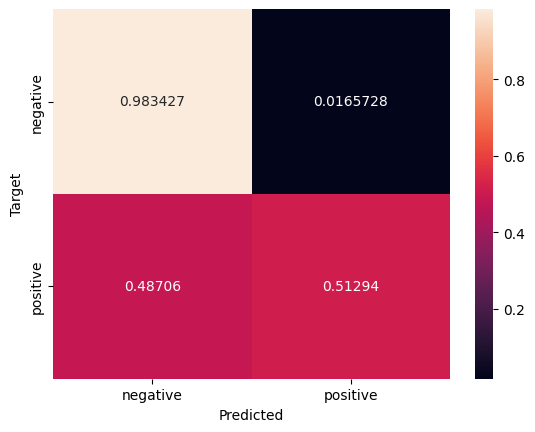

In [197]:
# to plot confusion matrix for AdaBoost testing set
# accuracy rate for Negative cases = 98.34%
# accuracy rate for Positive cases (diabetics) = 51.29%
ada_test_cm = confusion_matrix(y_test, ada_pred, normalize='true')
plot_cm(ada_test_cm)
plt.show()

In [199]:
# to compute the AUC score and F1 for AdaBoost model
print("Ada train AUC:", roc_auc_score(y_train, ada_train_pred))
print("Ada test AUC:", roc_auc_score(y_test, ada_pred))

Ada train AUC: 0.7461855899195172
Ada test AUC: 0.7481835304542687


In [201]:
# AUC score for AdaBoost classifier test model = 0.748

In [203]:
print("Ada train F1:", f1_score(y_train, ada_train_pred))
print("Ada test F1:", f1_score(y_test, ada_pred)) # F1 score AdaBoost classifier

Ada train F1: 0.5795019424802258
Ada test F1: 0.5846432498867974


In [205]:
print(classification_report(y_test,ada_pred)) # AdaBoost classifier

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128524
           1       0.68      0.51      0.58      8810

    accuracy                           0.95    137334
   macro avg       0.82      0.75      0.78    137334
weighted avg       0.95      0.95      0.95    137334



In [207]:
gb = GradientBoostingClassifier()

In [209]:
gb.fit(scaled_X_train, y_train)

GradientBoostingClassifier()

In [211]:
gb_pred = gb.predict(scaled_X_test)

In [213]:
gb_pred 

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [215]:
# to predict on the Gradient Boost training set
gb_train_pred = gb.predict(scaled_X_train)

In [217]:
gb_train_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [219]:
# to compute the AUC and F1 score for Gradient Boost model
print("GB train AUC:", roc_auc_score(y_train, gb_train_pred))
print("GB test AUC:", roc_auc_score(y_test, gb_pred))

GB train AUC: 0.7522351782969752
GB test AUC: 0.7535572804591703


In [221]:
# AUC score for Gradient Boost classifier test model = 0.75

In [223]:
print("GB train F1:", f1_score(y_train, gb_train_pred))
print("GB test F1:", f1_score(y_test, gb_pred))  # F1 score for Gradient Boost

GB train F1: 0.5906989696463381
GB test F1: 0.5935791031332432


In [225]:
print(classification_report(y_test,gb_pred)) # GB

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128524
           1       0.69      0.52      0.59      8810

    accuracy                           0.95    137334
   macro avg       0.83      0.75      0.78    137334
weighted avg       0.95      0.95      0.95    137334



In [227]:
xg = XGBClassifier()

In [229]:
xg.fit(scaled_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [231]:
# to predict on X test data, XGBoost classifier
xg_pred = xg.predict(scaled_X_test)

In [233]:
xg_pred

array([0, 0, 0, ..., 0, 0, 1])

In [235]:
# to return predictions on the XGBoost train set
xg_train_pred = xg.predict(scaled_X_train)

In [237]:
xg_train_pred

array([0, 1, 0, ..., 0, 0, 0])

In [239]:
# to print XGBoost confusion matrix on train set
xg_train_cm = confusion_matrix(y_train, xg_train_pred, normalize='true')
xg_train_cm

array([[0.98305819, 0.01694181],
       [0.45164301, 0.54835699]])

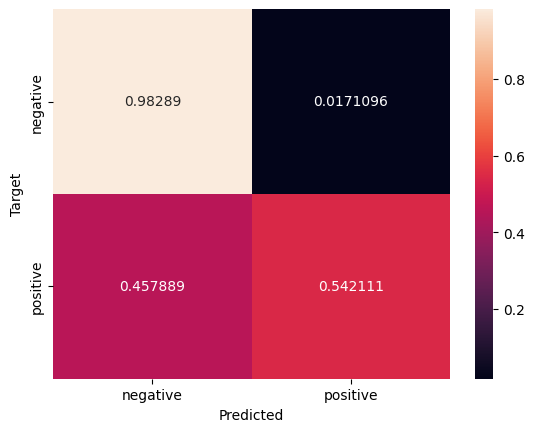

In [243]:
# to print XGBoost confusion matrix on testing set
# accuracy rate True negative cases = 98.2%
# accuracy rate True positive cases (Covid-19) = 54.2%
xg_test_cm = confusion_matrix(y_test, xg_pred, normalize='true')
plot_cm(xg_test_cm)
plt.show()

In [245]:
# to compute the AUC and F1 score for XGBoost classifier model
print("XGB train AUC:", roc_auc_score(y_train, xg_train_pred))
print("XGB test AUC:", roc_auc_score(y_test, xg_pred))

XGB train AUC: 0.7657075909896253
XGB test AUC: 0.7625007961695968


In [247]:
# AUC score for XGBoost classifier test model = 0.76

In [249]:
print("XGB train F1:", f1_score(y_train, xg_train_pred))
print("XGB test F1:", f1_score(y_test, xg_pred)) # F1 score XGBoost

XGB train F1: 0.6099379900019122
XGB test F1: 0.6051314539119417


In [251]:
print(classification_report(y_test,xg_pred)) # XGBoost

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128524
           1       0.68      0.54      0.61      8810

    accuracy                           0.95    137334
   macro avg       0.83      0.76      0.79    137334
weighted avg       0.95      0.95      0.95    137334



In [253]:
dt = DecisionTreeClassifier()

In [255]:
dt.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [257]:
dt_pred = dt.predict(scaled_X_test)

In [259]:
dt_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [261]:
# to do prediction on X train set: Decision Tree
dt_train_pred = dt.predict(scaled_X_train)

In [263]:
dt_train_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [265]:
# to compute the confusion matrix on Decision tree train set
dt_train_cm = confusion_matrix(y_train, dt_train_pred, normalize='true')
dt_train_cm

array([[0.98311484, 0.01688516],
       [0.4390196 , 0.5609804 ]])

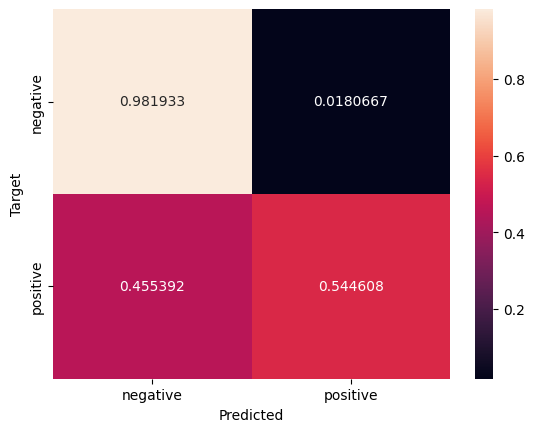

In [269]:
# to plot the confusion tree matrix for Decision Tree testing set
# accuracy rate Negative cases = 98.1%
# accuracy rate Positive cases (Covid-19) = 54.46%
dt_test_cm = confusion_matrix(y_test, dt_pred, normalize='true')
plot_cm(dt_test_cm)
plt.show()

In [271]:
# to print the AUC score and F1 score for Decision Tree prediction model
print("DT train AUC:", roc_auc_score(y_train, dt_train_pred))
print("DT test AUC:", roc_auc_score(y_test, dt_pred))

DT train AUC: 0.7720476211001612
DT test AUC: 0.7632708674770716


In [273]:
# AUC score for Decision Tree classifier test model= 0.76

In [275]:
print("DT train F1:", f1_score(y_train, dt_train_pred))
print("DT test F1:", f1_score(y_test, dt_pred)) # F1 score for Decision tree 

DT train F1: 0.6199147827502918
DT test F1: 0.6023854362837414


In [277]:
print(classification_report(y_test,dt_pred)) # Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128524
           1       0.67      0.54      0.60      8810

    accuracy                           0.95    137334
   macro avg       0.82      0.76      0.79    137334
weighted avg       0.95      0.95      0.95    137334



In [279]:
# Random Forest classifier AUC test score = 0.764 (highest)

In [281]:
rf.feature_importances_

array([0.00000000e+00, 4.46482794e-03, 1.57905592e-02, 1.23150708e-05,
       4.33984148e-03, 1.06203140e-02, 1.06975876e-02, 1.12847364e-02,
       1.00960224e-02, 1.15322929e-02, 3.32970658e-02, 1.50903749e-01,
       4.50309618e-03, 6.71809820e-03, 7.25398154e-03, 4.32605552e-03,
       2.81720198e-03, 1.06288620e-02, 1.79844749e-01, 3.74041482e-01,
       3.66800751e-02, 8.84077473e-03, 3.13871574e-04, 1.41775969e-05,
       9.90658450e-03, 2.86136483e-02, 1.52198943e-02, 8.04551556e-03,
       1.52435352e-02, 1.34665239e-02, 1.04825611e-02])

In [287]:
pd.DataFrame(data=rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
icu_yn_Yes,0.374041
hosp_yn_Yes,0.179845
age_group_80+ Years,0.150904
medcond_yn_Yes,0.036680
age_group_70 - 79 Years,0.033297
Month_June,0.028614
sex_Male,0.015791
Month_November,0.015244
Month_March,0.015220
Month_October,0.013467


In [289]:
# to read into a new dataframe
rfc_imp = pd.DataFrame(data=rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [291]:
#  to remove variable importance of less than 0.005
rfc_imp = rfc_imp[rfc_imp['Importance'] > 0.005]
rfc_imp

,Importance
icu_yn_Yes,0.374041
hosp_yn_Yes,0.179845
age_group_80+ Years,0.150904
medcond_yn_Yes,0.036680
age_group_70 - 79 Years,0.033297
Month_June,0.028614
sex_Male,0.015791
Month_November,0.015244
Month_March,0.015220
Month_October,0.013467


C:\Users\miche\AppData\Local\Temp\ipykernel_7328\65144759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfc_imp, x='Importance', y=rfc_imp.index, palette='coolwarm')


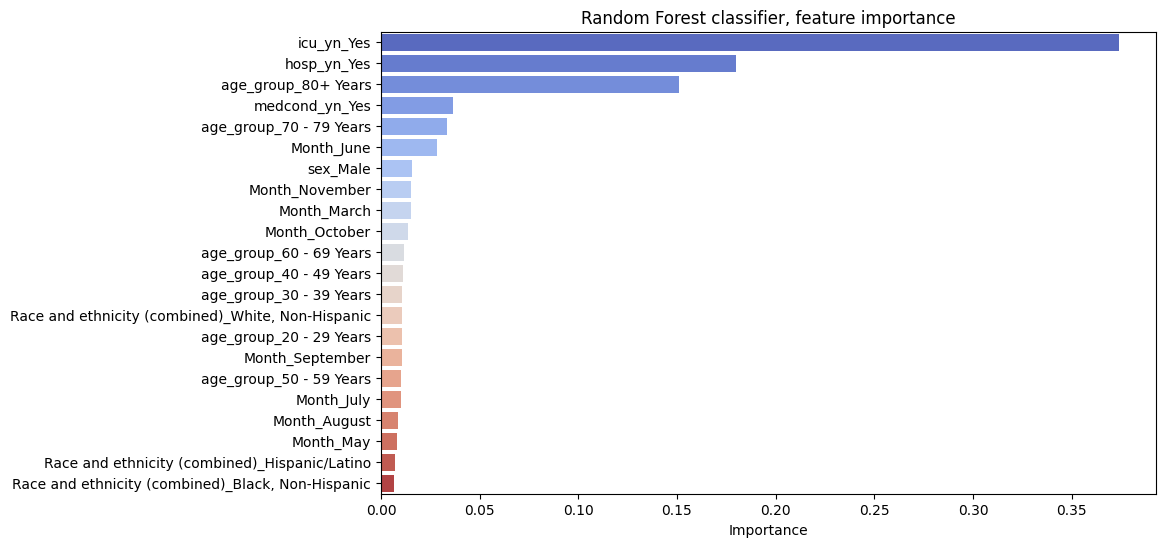

In [297]:
# Predictors: 1) icu_yn_Yes, 2)hosp_yn_Yes, 3)age_group_80+ Years, 4)medcond_yn
# to visualise in a barplot
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=rfc_imp, x='Importance', y=rfc_imp.index, palette='coolwarm')
plt.title("Random Forest classifier, feature importance", fontsize=12)
plt.ylabel("")
plt.show()

In [ ]:
# Patient who passed away from Covid-19 mostl have pre-existing medical conditions, aged 80 years and above, has been hospitalised in ICU